# Day 4

Modeling plant phenology

<div class="alert alert-warning">
If figures/tables are not rendered correctly, make sure your notebook is `trusted` by choosing `Trust Notebook` command found in `View` - `Activate Command Palette` menu. Typing in the first letters (i.e. "tr") should give you the command.
</div>

In [1]:
using Cropbox

In [2]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

In [3]:
using CSV
using DataFrames
using Dates
using TimeZones

## 1. Growing Degree Days (GDD)

### Ex 4.1

We're going to use maize (corn) measurement data collected from a field experiment took place in Beltsville, Maryland at the research farm of USDA-ARS Beltsville Agricultural Research Center (BARC) in 2002. The data sets include daily weather, weather with every 5 min intervals, biomass by parts, leaf area growth per plant, and the number of leaves determined by counting leaf tips weekly. Planting date was 18 May 2002.

#### Ex 4.1.1

Using the daily weather data, determine the growing degree days (GDD) ($T_b$ = 8.0 °C and $T_{opt}$ = 32.0 °C) accrued for each day.

- Eq 4.1 & 4.2

$$
\begin{align}
\mathrm{GDD}(T) &= \max \{ 0, \min \{ T, T_{opt} \} - T_b \} \\
\mathrm{cGDD} &= \sum_t \mathrm{GDD}(T_t) \cdot \Delta t \\
\end{align}
$$

In [4]:
@system GrowingDegreeDay begin
    T:  temperature         ~ preserve(parameter, u"°C")
    Tb: base_temperature    ~ preserve(parameter, u"°C")
    To: optimal_temperature ~ preserve(parameter, u"°C")

    GDD(T, Tb, To): growing_degree_day => begin
        min(T, To) - Tb
    end ~ track(min = 0, u"K")

    cGDD(GDD): cumulative_growing_degree_day ~ accumulate(u"K*d")
end

GrowingDegreeDay

In [5]:
@system GDDController(GrowingDegreeDay, Controller)

GDDController

In [6]:
gdd_config = @config (
    Clock => (;
        step = 1u"d",
    ),
    GrowingDegreeDay => (;
        Tb = 8.0,
        To = 32.0,
    ),
)

step,=,24 hr
Tb,=,8.0 °C
To,=,32.0 °C


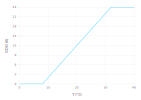

In [7]:
visualize(GDDController, :T, :GDD;
    config = gdd_config,
    xstep = :0 => :T => 0:40,
    kind = :line,
)

In [8]:
manipulate(GDDController, :T, :GDD;
    config = Clock => :step => 1u"d",
    parameters = GrowingDegreeDay => (;
        Tb = 0:0.1:10,
        To = 1:40,
    ),
    xstep = :0 => :T => -5:45,
    ylim = (0, 40),
    kind = :line,
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["GrowingDegreeDay"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Tb (°C)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(51), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa77c861b60, Task (runnable) @0x00007fa77c861b60), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data =

In [9]:
corn_weather = CSV.read("data/corn_weather.csv", DataFrame) |> unitfy

Row,year,jday,rad,Tavg,Tmax,Tmin,rainfall,date,GDD,cGDD
,Int64,Int64,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Date,Quantity…,Quantity…
1,2002,135,295.8 W m^-2,14.9 °C,22.1 °C,8.6 °C,0 mm,2002-05-15,6.9 d K,13.8 d K
2,2002,136,297.9 W m^-2,18.0 °C,27.7 °C,4.9 °C,0 mm,2002-05-16,10.0 d K,23.8 d K
3,2002,137,224.2 W m^-2,21.3 °C,27.3 °C,14.3 °C,3 mm,2002-05-17,13.3 d K,37.1 d K
4,2002,138,95.8 W m^-2,12.5 °C,17.7 °C,8.0 °C,11 mm,2002-05-18,4.5 d K,41.6 d K
5,2002,139,314.9 W m^-2,9.6 °C,15.6 °C,4.0 °C,0 mm,2002-05-19,1.6 d K,43.2 d K
6,2002,140,284.6 W m^-2,10.1 °C,15.6 °C,4.3 °C,0 mm,2002-05-20,2.1 d K,45.3 d K
7,2002,141,275.0 W m^-2,8.8 °C,14.5 °C,2.6 °C,0 mm,2002-05-21,0.8 d K,46.1 d K
8,2002,142,320.0 W m^-2,11.6 °C,20.1 °C,1.4 °C,0 mm,2002-05-22,3.6 d K,49.7 d K
9,2002,143,318.5 W m^-2,14.7 °C,24.0 °C,3.0 °C,0 mm,2002-05-23,6.7 d K,56.4 d K


In [10]:
@system Temperature begin
    calendar(context)             ~      ::Calendar
    t(calendar.date): date        ~ track::date

    data                          ~ provide(parameter, index = :date, init = t)
    T:                temperature ~ drive(from = data, by = :Tavg, u"°C")
end

Temperature

`Temperature` is a mix-in system for loading up temperature variable from an external data source. It relies on variables with kind of `provide` and `drive`. For handling time variable in calendar date format (YYYY/MM/DD), we also deploy a `Calendar` system included with Cropbox.

- `provide` *provides* a data frame with given index (`index`) starting from an initial value (`init`). Since we're going to provide a data frame using a configuration, the variable is tagged `parameter`.

- `drive` makes a *driving* variable from a data source (`from`) with a given column name (`by`). The data source is often supplied by `provide`.

- `Calendar` is like `Clock` embedded in `Context` system that provides `time` and `step` variables, but in the type of `ZonedDateTime` (`datetime` in Cropbox). A full specification looks like below.

```julia
@system Calendar begin
    init ~ preserve::datetime(extern, parameter)
    last => nothing ~ preserve::datetime(extern, parameter, optional)
    time(t0=init, t=context.clock.time) => t0 + convert(Cropbox.Dates.Second, t) ~ track::datetime
    date(time) => Cropbox.Dates.Date(time) ~ track::date
    step(context.clock.step) ~ preserve(u"hr")
    stop(time, last) => begin
        isnothing(last) ? false : (time >= last)
    end ~ flag
    count(init, last, step) => begin
        if isnothing(last)
            nothing
        else
            # number of update!() required to reach `last` time
            (last - init) / step
        end
    end ~ preserve::int(round, optional)
end
```

In [11]:
corn_config = @config (
    Calendar => (;
        init = ZonedDateTime(2002, 5, 15, tz"America/New_York"),
        last = ZonedDateTime(2002, 9, 30, tz"America/New_York"),
    ),
    Clock => (;
        step = 1u"d",
    ),
    Temperature => (;
        data = corn_weather,
    ),
)

init,=,"ZonedDateTime(2002, 5, 15, tz""America/New_York"")"
last,=,"ZonedDateTime(2002, 9, 30, tz""America/New_York"")"
step,=,24 hr
data,=,139×10 DataFrame…


`Calendar` system embedded in `Temperature` above accepts `init` and `last` parameters in the type of `ZonedDateTime` for representing timestamps with proper time zone support. We need time zone because the default time resolution in Cropbox is by an hour and things can become tricky when it comes to handling daylight savings. To simplify our exercises, we will use daily time step for the most part of simulations here. `Calendar` also provides `stop` variable that taps on the interval between `init` and `last` to inform `simulate()` when simulation should be done.

In [12]:
@system GDDCalculator(GrowingDegreeDay, Temperature, Controller)

GDDCalculator

In [13]:
gddc_config = @config (
    corn_config,
    gdd_config,
)

init,=,"ZonedDateTime(2002, 5, 15, tz""America/New_York"")"
last,=,"ZonedDateTime(2002, 9, 30, tz""America/New_York"")"
step,=,24 hr
data,=,139×10 DataFrame…
Tb,=,8.0 °C
To,=,32.0 °C


In [14]:
simulate(GDDCalculator;
    config = gddc_config,
    stop = "calendar.stop",
    index = :t,
    target = [:GDD, :cGDD],
)

Row,t,GDD,cGDD
,Date,Quantity…,Quantity…
1,2002-05-15,6.9 K,0.0 d K
2,2002-05-16,10.0 K,6.9 d K
3,2002-05-17,13.3 K,16.9 d K
4,2002-05-18,4.5 K,30.2 d K
5,2002-05-19,1.6 K,34.7 d K
6,2002-05-20,2.1 K,36.3 d K
7,2002-05-21,0.8 K,38.4 d K
8,2002-05-22,3.6 K,39.2 d K
9,2002-05-23,6.7 K,42.8 d K


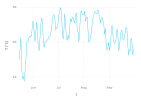

In [15]:
visualize(GDDCalculator, :t, :T;
    config = gddc_config,
    stop = "calendar.stop",
    kind = :line
)

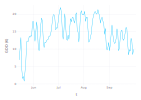

In [16]:
visualize(GDDCalculator, :t, :GDD;
    config = gddc_config,
    stop = "calendar.stop",
    kind = :line,
)

#### Ex 4.1.2

Determine cumulative GDD (cGDD) since planting until harvest on 30 September 2002.

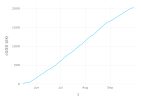

In [17]:
visualize(GDDCalculator, :t, :cGDD;
    config = gddc_config,
    stop = "calendar.stop",
    kind = :line,
)

#### Ex 4.1.3

Determine leaf appearance rate for up to 17 leaves based on phyllochron of 43.0.

In [18]:
@system LeafAppearanceGD(GrowingDegreeDay, Temperature, Controller) begin
    N: leaves_total ~ preserve::int(parameter)
    p: phyllochron  ~ preserve(parameter, u"K*d")
    
    n(cGDD, p): leaves_appeared => begin
        cGDD / p
    end ~ track::int(round = :floor)

    m(n, N): match             => (n >= N) ~ flag
    stop(m, s = calendar.stop) => (m || s) ~ flag
end

LeafAppearanceGD

`flag` is a kind of variable similar to `track` associated with `Bool` (ture or false) type. Additionally, it allows composition with logical operators in supported tags like `when` for some variables like `track` and `accumulate`.

- `match` is a flag variable indicating a certain threshold of thermal accumulation is fulfilled.
- `stop` is a flag variable to determine if the simulation needs to be terminated when a successful match is found or when it reaches the `last` day of calendar.

In [19]:
lagd_config = @config (
    corn_config,
    gdd_config,
    LeafAppearanceGD => (;
        N = 17,
        p = 43.0,
    ),
)

init,=,"ZonedDateTime(2002, 5, 15, tz""America/New_York"")"
last,=,"ZonedDateTime(2002, 9, 30, tz""America/New_York"")"
step,=,24 hr
data,=,139×10 DataFrame…
Tb,=,8.0 °C
To,=,32.0 °C
N,=,17
p,=,43.0 d K


In [20]:
lagd_result = simulate(LeafAppearanceGD;
    config = lagd_config,
    stop = :stop,
    index = :t,
    target = [:T, :GDD, :cGDD, :p, :n, :match, :stop],
)

Row,t,T,GDD,cGDD,p,n,match,stop
,Date,Quantity…,Quantity…,Quantity…,Quantity…,Int64,Bool,Bool
1,2002-05-15,14.9 °C,6.9 K,0.0 d K,43.0 d K,0,false,false
2,2002-05-16,18.0 °C,10.0 K,6.9 d K,43.0 d K,0,false,false
3,2002-05-17,21.3 °C,13.3 K,16.9 d K,43.0 d K,0,false,false
4,2002-05-18,12.5 °C,4.5 K,30.2 d K,43.0 d K,0,false,false
5,2002-05-19,9.6 °C,1.6 K,34.7 d K,43.0 d K,0,false,false
6,2002-05-20,10.1 °C,2.1 K,36.3 d K,43.0 d K,0,false,false
7,2002-05-21,8.8 °C,0.8 K,38.4 d K,43.0 d K,0,false,false
8,2002-05-22,11.6 °C,3.6 K,39.2 d K,43.0 d K,0,false,false
9,2002-05-23,14.7 °C,6.7 K,42.8 d K,43.0 d K,0,false,false


In [21]:
last(lagd_result, 10)

Row,t,T,GDD,cGDD,p,n,match,stop
,Date,Quantity…,Quantity…,Quantity…,Quantity…,Int64,Bool,Bool
1,2002-06-29,24.1 °C,16.1 K,572.5 d K,43.0 d K,13,false,false
2,2002-06-30,24.0 °C,16.0 K,588.6 d K,43.0 d K,13,false,false
3,2002-07-01,25.8 °C,17.8 K,604.6 d K,43.0 d K,14,false,false
4,2002-07-02,27.9 °C,19.9 K,622.4 d K,43.0 d K,14,false,false
5,2002-07-03,29.2 °C,21.2 K,642.3 d K,43.0 d K,14,false,false
6,2002-07-04,29.9 °C,21.9 K,663.5 d K,43.0 d K,15,false,false
7,2002-07-05,28.2 °C,20.2 K,685.4 d K,43.0 d K,15,false,false
8,2002-07-06,23.1 °C,15.1 K,705.6 d K,43.0 d K,16,false,false
9,2002-07-07,20.8 °C,12.8 K,720.7 d K,43.0 d K,16,false,false


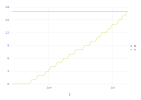

In [22]:
visualize(LeafAppearanceGD, :t, [:N, :n];
    config = lagd_config,
    stop = :stop,
    kind = :line,
)

#### Ex 4.1.4

Plot the predicted and observed leaf appearance data over days after planting (DAP) in the same figure.

In [23]:
corn_obs = CSV.read("data/corn_sample.csv", DataFrame) |> unitfy

Row,year,jday,date,SampleNo,Stage,VSLfNo,Ht,Diameter,TotLfNo,LA,StemDW,LfDW,EarDW,Green,LfNo,DAS,shootDW,SLA
,Int64,Int64,Date,Int64,String3?,Int64?,Float64?,Quantity…?,Int64?,Quantity…,Quantity…,Quantity…,Quantity…,Int64?,Int64?,Quantity…,Quantity…,Quantity…
1,2002,162,2002-06-11,1,V5,5,48.0,missing,7,178.57 cm^2,0.675 g,0.829 g,0.0 g,missing,7,27 d,1.504 g,215.404 cm^2 g^-1
2,2002,162,2002-06-11,2,V5,5,44.0,missing,8,220.09 cm^2,0.9 g,1.007 g,0.0 g,missing,8,27 d,1.907 g,218.56 cm^2 g^-1
3,2002,162,2002-06-11,3,V5,5,40.0,missing,7,152.73 cm^2,0.455 g,0.611 g,0.0 g,missing,7,27 d,1.066 g,249.967 cm^2 g^-1
4,2002,162,2002-06-11,4,V5,5,49.5,missing,8,306.52 cm^2,1.32 g,1.389 g,0.0 g,missing,8,27 d,2.709 g,220.677 cm^2 g^-1
5,2002,162,2002-06-11,5,V5,5,51.5,missing,9,276.78 cm^2,1.056 g,1.269 g,0.0 g,missing,9,27 d,2.325 g,218.109 cm^2 g^-1
6,2002,162,2002-06-11,6,V5,5,48.5,missing,8,198.26 cm^2,0.81 g,0.892 g,0.0 g,missing,8,27 d,1.702 g,222.265 cm^2 g^-1
7,2002,162,2002-06-11,7,V5,5,49.0,missing,8,207.5 cm^2,0.901 g,1.016 g,0.0 g,missing,8,27 d,1.917 g,204.232 cm^2 g^-1
8,2002,162,2002-06-11,8,V5,5,40.5,missing,7,135.7 cm^2,0.568 g,0.622 g,0.0 g,missing,7,27 d,1.19 g,218.167 cm^2 g^-1
9,2002,162,2002-06-11,9,V4,4,39.0,missing,7,123.88 cm^2,0.392 g,0.545 g,0.0 g,missing,7,27 d,0.937 g,227.303 cm^2 g^-1


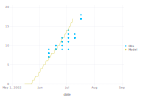

In [24]:
p = visualize(corn_obs, :date, :TotLfNo;
    xlim = (Date(2002, 5), Date(2002, 9)),
    ylim = (0, 20),
    name = "Obs",
)
visualize!(p, LeafAppearanceGD, :t, :n;
    config = lagd_config,
    stop = :stop,
    kind = :line,
    name = "Model",
)

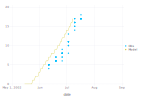

In [25]:
p = visualize(corn_obs, :date, :VSLfNo;
    xlim = (Date(2002, 5), Date(2002, 9)),
    ylim = (0, 20),
    name = "Obs",
)
visualize!(p, LeafAppearanceGD, :t, :n;
    config = lagd_config,
    stop = :stop,
    kind = :line,
    name = "Model",
)

#### Ex 4.1.5

Determine RMSE and EF, and interpret and discuss your findings.

In [26]:
evaluate(LeafAppearanceGD, corn_obs;
    config = lagd_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :rmse,
)

1.5732132722552274

In [27]:
evaluate(LeafAppearanceGD, corn_obs;
    config = lagd_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :ef,
)

0.24297457465111838

## 2. Beta distribution function

### Ex 4.2

Using the same data as above, answer the following questions based on the leaf tip appearance rate predicted by the beta function.

- Eq 4.3

$$
r(T) = R_{max} \left( \frac{T_{ceil} - T}{T_{ceil} - T_{opt}} \right) \left( \frac{T - T_{min}}{T_{opt} - T_{min}} \right) ^ {\frac{T_{opt} - T_{min}}{T_{ceil} - T_{opt}}}
$$

Here we explicitly use $T_{min}$ to make sure we have a proper unit (`K` instead of `°C`) from [calculation bewteen temperature variables](https://painterqubits.github.io/Unitful.jl/stable/temperature/).

#### Ex 4.2.1

Create a system to predict the leaf appearance rate based on beta function with the parameter values found in Yan and Hunt (1999): $R_{max}$ = 0.58 $\mathrm{d^{-1}}$, $T_{opt}$ = 31.4 °C, and $T_{ceil}$ = 41.0 °C.

In [28]:
@system BetaFunc begin
    T:  temperature              ~ preserve(parameter, u"°C")
    Tn: minimum_temperature => 0 ~ preserve(parameter, u"°C")
    To: optimal_temperature      ~ preserve(parameter, u"°C")
    Tc: ceiling_temperature      ~ preserve(parameter, u"°C")
    Rx: maximum_rate        => 1 ~ preserve(parameter, u"d^-1")

    r(T, Tn, To, Tc, Rx): rate => begin
        Rx * (Tc - T) / (Tc - To) * ((T - Tn) / (To - Tn))^((To - Tn) / (Tc - To))
    end ~ track(min = 0, max = Rx, u"d^-1")

    R(r): cumulative_rate ~ accumulate
end

BetaFunc

In [29]:
@system BFController(BetaFunc, Controller)

BFController

In [30]:
bf_config = @config (
    BetaFunc => (;
        Rx = 0.58,
        To = 31.4,
        Tc = 41.0,
    ),
)

Rx,=,0.58 d^-1
To,=,31.4 °C
Tc,=,41.0 °C


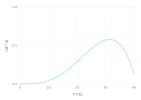

In [31]:
visualize(BFController, :T, :r;
    config = bf_config,
    xstep = :0 => :T => 0:40,
    kind = :line,
)

In [32]:
manipulate(BFController, :T, :r;
    parameters = BetaFunc => (;
        Rx = 0:0.1:1,
        To = 0:0.1:40,
        Tc = 0:0.1:60,
    ),
    xstep = :0 => :T => 0:50,
    ylim = (0, 1),
    kind = :line,
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["BetaFunc"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Rx (d^-1)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(6), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa71d281880, Task (runnable) @0x00007fa71d281880), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"form

#### Ex 4.2.2

Using daily weather data, simulate the leaf tip appearance up to 17 leaves throughout the experiment based on the beta function model.

In [33]:
@system BFCalculator(BetaFunc, Temperature, Controller)

BFCalculator

In [34]:
bfc_config = @config (
    corn_config,
    bf_config,
)

init,=,"ZonedDateTime(2002, 5, 15, tz""America/New_York"")"
last,=,"ZonedDateTime(2002, 9, 30, tz""America/New_York"")"
step,=,24 hr
data,=,139×10 DataFrame…
Rx,=,0.58 d^-1
To,=,31.4 °C
Tc,=,41.0 °C


In [35]:
simulate(BFCalculator;
    config = bfc_config,
    stop = "calendar.stop",
    index = :t,
    target = [:r, :R],
)

Row,t,r,R
,Date,Quantity…,Float64
1,2002-05-15,0.137685 d^-1,0.0
2,2002-05-16,0.225146 d^-1,0.137685
3,2002-05-17,0.334444 d^-1,0.362831
4,2002-05-18,0.0846455 d^-1,0.697275
5,2002-05-19,0.0393301 d^-1,0.781921
6,2002-05-20,0.0456957 d^-1,0.821251
7,2002-05-21,0.0303425 d^-1,0.866947
8,2002-05-22,0.0683851 d^-1,0.897289
9,2002-05-23,0.132741 d^-1,0.965674


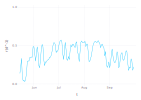

In [36]:
visualize(BFCalculator, :t, :r;
    config = bfc_config,
    stop = "calendar.stop",
    kind = :line,
)

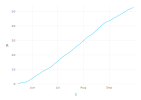

In [37]:
visualize(BFCalculator, :t, :R;
    config = bfc_config,
    stop = "calendar.stop",
    kind = :line,
)

In [38]:
@system LeafAppearanceBF(BetaFunc, Temperature, Controller) begin
    N: leaves_total       ~ preserve::int(parameter)
    
    n(R): leaves_appeared ~ track::int(round = :floor)
    
    match(n, N)                        => (n >= N) ~ flag
    stop(m = match, s = calendar.stop) => (m || s) ~ flag
end

LeafAppearanceBF

In [39]:
labf_config = @config (
    corn_config,
    bf_config,
    LeafAppearanceBF => (;
        N = 17,
    ),
)

init,=,"ZonedDateTime(2002, 5, 15, tz""America/New_York"")"
last,=,"ZonedDateTime(2002, 9, 30, tz""America/New_York"")"
step,=,24 hr
data,=,139×10 DataFrame…
Rx,=,0.58 d^-1
To,=,31.4 °C
Tc,=,41.0 °C
N,=,17


In [40]:
labf_result = simulate(LeafAppearanceBF;
    config = labf_config,
    stop = :stop,
    index = :t,
    target = [:T, :r, :R, :n, :match, :stop],
)

Row,t,T,r,R,n,match,stop
,Date,Quantity…,Quantity…,Float64,Int64,Bool,Bool
1,2002-05-15,14.9 °C,0.137685 d^-1,0.0,0,false,false
2,2002-05-16,18.0 °C,0.225146 d^-1,0.137685,0,false,false
3,2002-05-17,21.3 °C,0.334444 d^-1,0.362831,0,false,false
4,2002-05-18,12.5 °C,0.0846455 d^-1,0.697275,0,false,false
5,2002-05-19,9.6 °C,0.0393301 d^-1,0.781921,0,false,false
6,2002-05-20,10.1 °C,0.0456957 d^-1,0.821251,0,false,false
7,2002-05-21,8.8 °C,0.0303425 d^-1,0.866947,0,false,false
8,2002-05-22,11.6 °C,0.0683851 d^-1,0.897289,0,false,false
9,2002-05-23,14.7 °C,0.132741 d^-1,0.965674,0,false,false


In [41]:
last(labf_result, 10)

Row,t,T,r,R,n,match,stop
,Date,Quantity…,Quantity…,Float64,Int64,Bool,Bool
1,2002-06-25,27.8 °C,0.535492 d^-1,12.5728,12,false,false
2,2002-06-26,27.8 °C,0.535492 d^-1,13.1083,13,false,false
3,2002-06-27,26.8 °C,0.511009 d^-1,13.6438,13,false,false
4,2002-06-28,23.5 °C,0.409753 d^-1,14.1548,14,false,false
5,2002-06-29,24.1 °C,0.429718 d^-1,14.5645,14,false,false
6,2002-06-30,24.0 °C,0.426422 d^-1,14.9942,14,false,false
7,2002-07-01,25.8 °C,0.483021 d^-1,15.4207,15,false,false
8,2002-07-02,27.9 °C,0.537714 d^-1,15.9037,15,false,false
9,2002-07-03,29.2 °C,0.562153 d^-1,16.4414,16,false,false


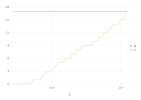

In [42]:
visualize(LeafAppearanceBF, :t, [:N, :n];
    config = labf_config,
    stop = :stop,
    kind = :line,
)

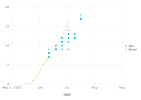

In [43]:
p = visualize(corn_obs, :date, :TotLfNo;
    xlim = (Date(2002, 5), Date(2002, 9)),
    ylim = (0, 20),
    name = "Obs",
)
visualize!(p, LeafAppearanceBF, :t, :n;
    config = labf_config,
    stop = :stop,
    kind = :line,
    name = "Model",
)

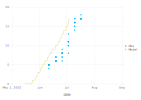

In [44]:
p = visualize(corn_obs, :date, :VSLfNo;
    xlim = (Date(2002, 5), Date(2002, 9)),
    ylim = (0, 20),
    name = "Obs",
)
visualize!(p, LeafAppearanceBF, :t, :n;
    config = labf_config,
    stop = :stop,
    kind = :line,
    name = "Model",
)

#### Ex 4.2.4

Determine RMSE and EF, and interpret and discuss your findings.

In [45]:
evaluate(LeafAppearanceBF, corn_obs;
    config = labf_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :rmse,
)

2.564176280991617

In [46]:
evaluate(LeafAppearanceBF, corn_obs;
    config = labf_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :ef,
)

-1.011087746128847

## 3. Chilling-Forcing Model

### Ex 4.3

In this exercise, we will calibrate and evaluate a two-stage tree phenology model for predicting peak bloom dates of Yoshino cherries in Washington DC. Because of historical, cultural, and economic importance of these Tidal Basin cherry trees, the National Park Service horticulture staff pays meticulous attention to monitor their flowering phenology and bloom dates trees (See how NPS collect cherry phenology data: https://www.nps.gov/subjects/cherryblossom/bloom-watch.htm). That is, data quality is likely to be quite good. Our own UW campus also has many cherry trees and the Yoshino cherries in the Quad in particular are touted for their spectacular blooms and attract many visitors from the public who appreciate the spring blooms. Until recently there was no coordinated effort of monitoring the bloom time of UW cherries so far except for some quasi-observational data based on local and campus news (*e.g.*, Daily), social media (*e.g.*, [UW Cherry Blossom Twitter](https://twitter.com/uwcherryblossom)), and casual records (See Chung et al. (2011)). This means that data quality is likely to be low for UW cherry blossoms. 

The chilling-forcing model (Cesaraccio et al., 2004) has been implemented in the Cropbox framework and will be available for you. The historical peak bloom dates of Washington DC and UW campus will be available (`Cherry_PBD.xls`) along with the corresponding temperature data at nearby weather stations for this exercise.

### 3.1. Model

Before we move on, here is a bit explanation of theory behind the model. [Cesaraccio *et al.*](https://doi.org/10.1016/j.agrformet.2004.03.002) split up dormancy break into two distinctive steps, rest and quiescence, that required the same amount of chilling and subsequent anti-chilling accumulation in the opposite direction. Later this model was [extended](https://doi.org/10.1371/journal.pone.0027439) to predict peak bloom date of cherry tree coming after bud burst. The following equation represents our adaptation of this chilling and forcing (CF) model with three parameters: temperature threshold ($T_c$), chilling ($R_{\mathtt{C}}$) and forcing ($R_{\mathtt{F}}$) requirements.

The original model used linear interpolation between maximum and minimum temperature values (Figure 7.4) to incorporate daily fluctuation of temperature. In this exercise, we use a much simpler form of the equation which works better when used with hourly temperature, yet with daily dataset for the sake of simplicity.

$$
\begin{aligned}
T_a & = \begin{cases}
  T & \text{if } T \geq 0 \\
  0 & \text{otherwise}
\end{cases} \\
\Delta T & = \frac{T_a - T_c}{\Delta t} \\
c & = \begin{cases}
  \Delta T & \text{if } \Delta T < 0 \\
  0 & \text{otherwise}
\end{cases} \\
f & = \begin{cases}
  \Delta T & \text{if } \Delta T > 0 \\
  0 & \text{otherwise}
\end{cases} \\
\sum_{t_0}^{\hat{t}_d-1} c & > R_{\mathtt{C}} \geq \sum_{t_0}^{\hat{t}_d} c \\
\sum_{\hat{t}_d}^{\hat{t}-1} f & < R_{\mathtt{F}} \leq \sum_{\hat{t}_d}^{\hat{t}} f \\
\end{aligned}
$$

In [47]:
@system ChillForceEstimator(Temperature, Controller) begin
    Tc: temperature_threshold ~ preserve(parameter, u"°C")
    Rc: chilling_requirement  ~ preserve(parameter, u"K*d")
    Rf: forcing_requirement   ~ preserve(parameter, u"K*d")

    y(t = calendar.last): year => Dates.year(t)      ~ preserve::int
    doy(t): day_of_year        => Dates.dayofyear(t) ~ track::int(u"d")

    Ta(T)                                   ~ track(min = 0, u"°C")
    ΔT(Ta, Tc)                 => (Ta - Tc) ~ track(u"K")

    c(ΔT): chilling                         ~ track(max = 0, u"K")
    C(c):  chilling_accumulated             ~ accumulate(when = !d, u"K*d")

    d(C, Rc): chilling_done    => (C <= Rc) ~ flag

    f(ΔT): forcing                          ~ track(min = 0, u"K")
    F(f):  forcing_accumulated              ~ accumulate(when = d, u"K*d")

    m(F, Rf): match            => (F >= Rf) ~ flag
    stop(m, s = calendar.stop) => (m || s)  ~ flag
end

ChillForceEstimator

For your reference, here is our implementation of the original model described by Cesaraccio *et al*. Note that it requires daily maximum and minimum temperature data.

In [48]:
@system CesaraccioChillForceEstimator(Controller) begin
    calendar(context) ~ ::Calendar
    t(calendar.date): date ~ track::date
    data ~ provide(parameter, index = :date, init = t)

    Ta: average_temperature ~ drive(from = data, by = :Tavg, u"°C")
    Tx: maximum_temperature ~ drive(from = data, by = :Tmax, u"°C")
    Tn: minimum_temperature ~ drive(from = data, by = :Tmin, u"°C")

    Tc: temperature_threshold ~ preserve(parameter, u"°C")
    Rc: chilling_requirement  ~ preserve(parameter, u"K*d")
    Rf: forcing_requirement   ~ preserve(parameter, u"K*d")

    year(t = calendar.last) => Dates.year(t) ~ preserve::int
    #tf(year): forced_dormancy_release_date => Date(year, 3, 1) ~ preserve::date(parameter)
    doy(t): day_of_year => Dates.dayofyear(t) ~ track::int(u"d")

    c(nounit(Tc), nounit(Tn), nounit(Ta), nounit(Tx)): chilling => begin
        if 0 <= Tc <= Tn <= Tx
            0
        elseif 0 <= Tn <= Tc < Tx
            -((Ta - Tn) - (Tx - Tc)^2 / 2(Tx - Tn))
        elseif 0 <= Tn <= Tx <= Tc
            -(Ta - Tn)
        elseif Tn < 0 <= Tx <= Tc
            -Tx^2 / 2(Tx - Tn)
        elseif Tn < 0 < Tc <= Tx
            -Tx^2 / 2(Tx - Tn) - (Tx - Tc)^2 / 2(Tx - Tn)
        else
            0
        end
    end ~ track(max = 0, u"K")
    C(c): chilling_accumulated ~ accumulate(when = !d, u"K*d")

    #d(C, Rc, tf, t): chilling_done => (C <= Rc || tf <= t) ~ flag
    d(C, Rc): chilling_done => (C <= Rc) ~ flag

    f(nounit(Tc), nounit(Tn), nounit(Ta), nounit(Tx)): forcing => begin
        if 0 <= Tc <= Tn <= Tx
            Ta - Tc
        elseif 0 <= Tn <= Tc < Tx
            (Tx - Tc)^2 / 2(Tx - Tn)
        elseif 0 <= Tn <= Tx <= Tc
            0
        elseif Tn < 0 <= Tx <= Tc
            0
        elseif Tn < 0 < Tc <= Tx
            (Tx - Tc)^2 / 2(Tx - Tn)
        else
            0
        end
    end ~ track(min = 0, u"K")
    F(f): forcing_accumulated ~ accumulate(when = d, u"K*d")

    m(F, Rf): match            => (F >= Rf) ~ flag
    stop(m, s = calendar.stop) => (m || s)  ~ flag
end

CesaraccioChillForceEstimator

In general, we can find these models similar to the GDD model we made earlier. A notable difference is that now we have two separate variables for accumulating chilling (cumulative `C` with the rate `c`) and forcing (cumulative `F` with the rate `f`). The end of chilling accumulation, which triggers the onset of forcing accumulation, flips `chilling_done` flag (`d`) which is used in the `when` tag for both accumulating variables.

We also need to think about handling exceptions which we would eventually encounter when trying to plug a large range of parameter values for calibration. ~There is a chance that chilling requirement is never fulfilled by either too high chilling requirement or too low rate of chilling accumulation. To prevent such case, we set `forced_dormancy_release_date` to March 1st of the given year.~ We decided not to use forced domancy release in this lab since it could also negatively impact calibration process, potentially leading to degenerated chilling acccumulation.

Sometimes our model would never be able to reach the forcing requirement within the given time frame which was set by the `last` day of `Calendar`, leaving no result in the output. We take care of such cases by supplying a `callback` function for `simulate()` to fill in *no result* with an arbitrary estimation date (365th day of the year).

In [49]:
callback(s, m) = if s.stop' && !s.match'
    m.result[end, :doy] = 365u"d"
end

callback (generic function with 1 method)

For convenience, we amek make `estimate()` function to call `simulate()` with some default arguments including `stop` and `callback` as well as configuration generated for each year by `cherry_config()` function explained later.

In [50]:
estimate(S, years;
    config,
    index = [:year, :doy],
    target = [],
    stop = :stop,
    kwargs...
) = simulate(S;
    configs = @config(config + cherry_config.(years)),
    index,
    target,
    stop,
    snap = stop,
    callback,
    kwargs...
)

estimate (generic function with 1 method)

### 3.2. Weather

In [51]:
dc_weather = CSV.read("data/dc_weather.csv", DataFrame) |> unitfy

Row,date,Tavg,Tmin,Tmax
,Date,Quantity…,Quantity…,Quantity…
1,1936-09-01,25.2 °C,15.7 °C,29.6 °C
2,1936-09-02,22.2 °C,19.1 °C,25.2 °C
3,1936-09-03,22.2 °C,19.1 °C,25.2 °C
4,1936-09-04,22.5 °C,16.3 °C,28.0 °C
5,1936-09-05,21.8 °C,13.5 °C,26.8 °C
6,1936-09-06,21.5 °C,15.2 °C,25.7 °C
7,1936-09-07,23.8 °C,16.9 °C,30.2 °C
8,1936-09-08,27.3 °C,20.7 °C,32.9 °C
9,1936-09-09,28.7 °C,22.4 °C,33.5 °C


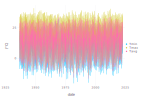

In [52]:
visualize(dc_weather, :date, [:Tmin, :Tmax, :Tavg]; kind = :line)

In [53]:
dc_config = @config (
    ChillForceEstimator => (;
        data = dc_weather,
    ),
)

data,=,31473×4 DataFrame…


### 3.3. Configuration

For each year, we need to specify start and end date of the simulation which are set by `init` and `last` of `Calendar`. Also don't forget setting daily time step for `Clock`. We create `cherry_config()` function to generate a configuration we need for each year.

In [54]:
cherry_config(year) = @config (
    Calendar => (;
        init = ZonedDateTime(year-1, 10,  1, tz"UTC"),
        last = ZonedDateTime(year,    5, 31, tz"UTC"),
    ),
    Clock => (;
        step = 1u"d",
    ),
)

cherry_config (generic function with 1 method)

In [55]:
cherry_config(2017)

init,=,"ZonedDateTime(2016, 10, 1, tz""UTC"")"
last,=,"ZonedDateTime(2017, 5, 31, tz""UTC"")"
step,=,24 hr


Then we need another configuration to supply parameters for chilling forcing model. For now, let's have some arbtirary values. We'll recalibrate them later.

In [56]:
cf_config = @config (
    ChillForceEstimator => (;
        Tc = 10,
        Rc = -100,
        Rf = 100,
    ),
)

Tc,=,10 °C
Rc,=,-100 d K
Rf,=,100 d K


### 3.4. Test

Here is simulation result for the year of 2017. Note we use `simulate()` with a handmade configuration instead of relying on `estimate()` for testing. Let's run it for about 8 months.

In [57]:
cf_df = simulate(ChillForceEstimator;
    config = (cf_config, dc_config, cherry_config(2017)),
    index = :t,
    target = [:T, :Ta, :Tx, :Tn, :Tc, :c, :C, :Rc, :f, :F, :Rf, :match, :stop],
    stop = 8*30u"d",
)

Progress: 100%[===========================] Time: 0:00:01 ( 6.04 ms/it)


Row,t,T,Ta,Tc,c,C,Rc,f,F,Rf,match,stop
,Date,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Bool,Bool
1,2016-10-01,18.3 °C,18.3 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,8.3 K,0.0 d K,100.0 d K,false,false
2,2016-10-02,20.4 °C,20.4 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,10.4 K,0.0 d K,100.0 d K,false,false
3,2016-10-03,21.1 °C,21.1 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,11.1 K,0.0 d K,100.0 d K,false,false
4,2016-10-04,18.6 °C,18.6 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,8.6 K,0.0 d K,100.0 d K,false,false
5,2016-10-05,18.0 °C,18.0 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,8.0 K,0.0 d K,100.0 d K,false,false
6,2016-10-06,18.1 °C,18.1 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,8.1 K,0.0 d K,100.0 d K,false,false
7,2016-10-07,19.3 °C,19.3 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,9.3 K,0.0 d K,100.0 d K,false,false
8,2016-10-08,19.0 °C,19.0 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,9.0 K,0.0 d K,100.0 d K,false,false
9,2016-10-09,16.5 °C,16.5 °C,10.0 °C,0.0 K,0.0 d K,-100.0 d K,6.5 K,0.0 d K,100.0 d K,false,false


Here is what temperature (`T`) trend looks like during the period.

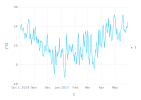

In [58]:
visualize(cf_df, :t, :T; #= [:Tx, :Tn];=#
    kind = :line,
    ylim = (-10, 30),
)

Then, here is `Ta` with all negative values stripped out. It is the value going to be used for calculating the degree of chilling and forcing. `Tc` is a threshold parameter used for calculating the degree of chilling and forcing.

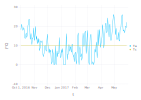

In [59]:
visualize(cf_df, :t, [:Ta, :Tc];
    kind = :line,
    ylim = (-10, 30),
)

Now we have the degree of chilling (`c`) and forcing (`f`) per unit time (day).

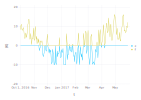

In [60]:
visualize(cf_df, :t, [:c, :f];
    kind = :line,
    ylim = (-20, 20),
)

We can more clearly see how chilling and forcing units respond to the base temperature ($T_c$) thanks to interactive plot.

In [61]:
manipulate(ChillForceEstimator, :t, [:c, :f];
    config = (cf_config, dc_config, cherry_config(2017)),
    parameters = ChillForceEstimator => :Tc => 0:0.1:20,
    stop = 8*30u"d",
    kind = :line,
    ylim = (-20, 20),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["ChillForceEstimator"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Tc (°C)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(101), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa71d69a9c0, Task (runnable) @0x00007fa71d69a9c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_da

The next plot shows how chilling and forcing would accumulate over the period. Note that chilling accumulation (`C`) starts first. Forcing accumulation (`F`) doesn't start until the chilling requirement (`Rc`) is fullfilled. Once the requirement is met, chilling accumulation stops. The output of model, an estimated date of particular phenological event, is determined when forcing accmulation (`F`) make a cross with forcing requirement (`Rf`), which is right before April in this example.

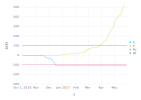

In [62]:
visualize(cf_df, :t, [:C, :F, :Rc, :Rf];
    kind = :line,
    ylim = (-300, 500),
)

Here is an interactive version.

In [63]:
manipulate(ChillForceEstimator, :t, [:C, :F, :Rc, :Rf];
    config = (cf_config, dc_config, cherry_config(2017)),
    parameters = ChillForceEstimator => (;
        Tc = 0:0.1:20,
        Rc = -300:0,
        Rf = 0:500,
    ),
    stop = 8*30u"d",
    kind = :line,
    ylim = (-300, 500),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["ChillForceEstimator"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Tc (°C)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(101), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa71d216e10, Task (runnable) @0x00007fa71d216e10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_da

Now, let's try `estimate()` to get the answer more directly.

In [64]:
estimate(ChillForceEstimator, [2017]; config = (cf_config, dc_config))

Row,year,doy
,Int64,Quantity…
1,2017,88 d


We may provide additional options as we used to do for `simulate()`.

In [65]:
estimate(ChillForceEstimator, [2017]; config = (cf_config, dc_config), target = [:C, :F])

Row,year,doy,C,F
,Int64,Quantity…,Quantity…,Quantity…
1,2017,88 d,-108.2 d K,105.3 d K


A nice feature of `estimate()` is that it supports simulation of multiple years in a convenient way. We'll revisit this later in this notebook.

In [66]:
estimate(ChillForceEstimator, 2010:2018; config = (cf_config, dc_config), target = [:C, :F])

Row,year,doy,C,F
,Int64,Quantity…,Quantity…,Quantity…
1,2010,97 d,-104.5 d K,107.8 d K
2,2011,111 d,-105.7 d K,106.6 d K
3,2012,81 d,-102.5 d K,102.1 d K
4,2013,108 d,-103.3 d K,108.9 d K
5,2014,104 d,-104.0 d K,108.0 d K
6,2015,107 d,-102.3 d K,102.8 d K
7,2016,93 d,-104.0 d K,111.6 d K
8,2017,88 d,-108.2 d K,105.3 d K
9,2018,105 d,-103.1 d K,102.0 d K


### 3.5. Observation

#### Ex 4.3.1

Using Cropbox, calibrate the chilling-forcing (CF) models using the Washington DC **Yoshino cherry** blooms and Reagan National weather data **from 1991 to 2010**. Provide parameter estimates and model performance measures for calibration (*i.e.*, RMSE, EF). How do the parameter estimates compare with the ones published in Chung et al. (2011)? If different, why do you think there's such difference when used the same data sets for calibration? 

We have a dataset with recordings of peak bloom dates from cherry trees in Washington, DC.

In [67]:
cherry_dc_obs = CSV.read("data/cherry_dc_obs.csv", DataFrame) |> unitfy

Row,year,doy
,Int64,Quantity…
1,1921,79 d
2,1922,97 d
3,1923,99 d
4,1924,104 d
5,1925,86 d
6,1926,101 d
7,1927,79 d
8,1928,99 d
9,1929,90 d


### 3.6. Calibration

We'll calibrate parameters (`Tc`, `Rc`, `Rf`) using the observation dataset from 1991 to 2010.

In [68]:
cf_calib_config = calibrate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(dc_config + cherry_config.(1991:2010)),
    index = :year,
    target = :doy,
    parameters = ChillForceEstimator => (;
        Tc = (3, 8),
        Rc = (-300, 0),
        Rf = (0, 300),
    ),
    stop = :stop,
    snap = :stop,
    callback,
    optim = (;
        MaxSteps = 100,
    ),
)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
10.06 secs, 28 evals, 14 steps, improv/step: 0.500 (last = 0.5000), fitness=77.000000000
20.49 secs, 55 evals, 30 steps, improv/step: 0.467 (last = 0.4375), fitness=68.000000000
31.06 secs, 84 evals, 47 steps, improv/step: 0.532 (last = 0.6471), fitness=54.000000000
41.71 secs, 114 evals, 66 steps, improv/step: 0.515 (last = 0.4737), fitness=54.000000000
52.18 secs, 142 evals, 85 steps, improv/step: 0.482 (last = 0.3684), fitness=54.000000000

Optimization stopped after 101 steps and 61.48 seconds
Termination reason: Max number of steps (100) reached
Steps per second = 1.64
Function evals per second = 2.70
Improvements/step = 0.47000
Total function evaluations = 166


Best candidate found: [6.35685, -141.446, 126.848

Tc,=,6.35685 °C
Rc,=,-141.446 d K
Rf,=,126.848 d K


In [69]:
# cf_calib_config = @config ChillForceEstimator => (;
#     Tc = 6.35685
#     Rc = -141.446,
#     Rf = 126.848,
# )

Now we run the model with calibrated parameters.

In [70]:
est = estimate(ChillForceEstimator, 1991:2010;
    config = (cf_calib_config, dc_config),
    target = [:C, :F],
)

Row,year,doy,C,F
,Int64,Quantity…,Quantity…,Quantity…
1,1991,87 d,-143.972 d K,134.381 d K
2,1992,102 d,-143.888 d K,130.867 d K
3,1993,107 d,-145.986 d K,132.367 d K
4,1994,100 d,-142.16 d K,127.524 d K
5,1995,95 d,-142.745 d K,131.638 d K
6,1996,95 d,-144.204 d K,131.938 d K
7,1997,87 d,-143.774 d K,127.224 d K
8,1998,91 d,-142.97 d K,135.822 d K
9,1999,95 d,-146.947 d K,127.41 d K


Here are actual dates for the same period.

In [71]:
cherry_dc_obs[1991 .<= cherry_dc_obs[!, :year] .<= 2010, :]

Row,year,doy
,Int64,Quantity…
1,1991,88 d
2,1992,98 d
3,1993,101 d
4,1994,95 d
5,1995,92 d
6,1996,95 d
7,1997,85 d
8,1998,86 d
9,1999,95 d


Then let's create a helper function `compare()` to make a plot for comparing observation and estimation of the model.

In [72]:
compare(S, obs, years; config, kw...) = begin
    E = estimate(S, years; config)
    O = obs[obs[!, :year] .∈ Ref(years), :]
    p = plot(O, :year, :doy; name = "Obs", kind = :line, kw...)
    plot!(p, E, :year, :doy; name = "Model", kind = :line)
end

compare (generic function with 1 method)

Again, here is the result of calibration from 1991 to 2010.

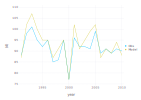

In [73]:
compare(ChillForceEstimator, cherry_dc_obs, 1991:2010;
    config = (cf_calib_config, dc_config),
    ylim = (75, 110),
)

In [74]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1991:2010)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :rmse,
)

3.5496478698597698 d

In [75]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1991:2010)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :ef,
)

0.5474137931034482

### 3.7. Evaluation

#### Ex 4.3.2

Evaluate the model performance using the **Yoshino cherry** blooms and Reagan National weather data **from 1937 to 1990**. Provide parameter estimates and model performance measures for calibration (*i.e.*, RMSE, EF). Interpret and discuss the results.

Progress: 100%[=========================================] Time: 0:00:01


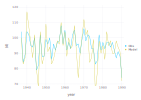

In [76]:
compare(ChillForceEstimator, cherry_dc_obs, 1937:1990; config=(cf_calib_config, dc_config), ylim=(70,120))

In [77]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1937:1990)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :rmse,
)

6.8136573091054355 d

In [78]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1937:1990)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :ef,
)

0.07519213034122352